<a href="https://colab.research.google.com/github/micazev/replanejando_bauru/blob/main/Bauru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio


In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)
     |████████████████████████████████| 225kB 31.5MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=0e8f3732e82d61f7b19e6e23105d81cf68639d098e07835c5015dc18b2b1afe2
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.7/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.7/dist-packages (1.1.0)


In [ ]:
import geopandas as gpd

In [ ]:
curvas_10 = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/curvas_10_10.shp")
cursos_dagua = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/cursos_dagua.shp")
ferrovia = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/ferrovia.shp")
limite_municipal = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/limite_municipal.shp")
loteamentos_bauru = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/loteamentos_bauru.shp")
mancha_urbana = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/mancha_urbana_(planodemanejo).shp")
massa_dagua = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/massa_dagua.shp")
municipios_sp = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/municipios_vizinhos.shp")
perimetro_urbano_2018 = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/perimetro_urbano_2018.shp")
rodovias = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/rodovias.shp")
setores_planejamento = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/setores_planejamento.shp")
vias_locais = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/vias_locais.shp")
vias_principais = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/vias_principais.shp")
vias_rurais = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/vias_rurais.shp")
estados_ibge = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/estados(ibge).shp")
perimetro_municipal = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/perimetro_municipal(pd2008).shp")
# perimetro_sp = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/perimetro_sp.shp")
regiao_adm = gpd.read_file("/content/drive/MyDrive/Bauru/00_SHP BASE/LOCALIZAÇÃO - layout/região_adm.shp")

In [ ]:
print(perimetro_municipal.crs)

epsg:31982


In [ ]:
# Area do municipio (area de cada poligono no dataframe)
perimetro_municipal.loc[:, "Area"] = perimetro_municipal.geometry.area / 1000

print("Area de Bauru: {} quilometros quadrados".format(perimetro_municipal.Area.sum()))
print("CRS:", perimetro_municipal.crs)
perimetro_municipal.head()

Area de Bauru: 671943.8947141055 quilometros quadrados
CRS: epsg:31982


,OBJECTID,Shape_Leng,Shape_Area,geometry,Area
0,1,152601.229838,67194.389471,"POLYGON Z ((690465.895 7559334.197 0.000, 6905...",671943.894714


In [ ]:
# Area dos loteamentos
loteamentos_bauru.loc[:, "Area"] = loteamentos_bauru.geometry.area / 1000

print("Loteamentos de Bauru: {} quilometros quadrados".format(loteamentos_bauru.Area.sum()))
print("CRS:", loteamentos_bauru.crs)
loteamentos_bauru.head()

Loteamentos de Bauru: 90740.90024575173 quilometros quadrados
CRS: epsg:31982


,Id,nome,OCUPADO,geometry,Area
0,0,LOTEAMENTO MÁRIO LUIZ RODRIGUES DO PRADO,PARCIAL,"POLYGON ((702269.710 7535445.992, 702331.422 7...",1138.560659
1,0,QUINTA DA BELA OLINDA,PARCIAL,"POLYGON ((701627.870 7535258.616, 701514.573 7...",2854.097685
2,0,CONJ. HAB. ISAURA PITTA GARMS,PARCIAL,"POLYGON ((702322.289 7534365.099, 702952.330 7...",398.017190
3,0,PARQUE GIANSANT,PARCIAL,"POLYGON ((703153.803 7534056.663, 703288.061 7...",238.988354
4,0,CHÁCARAS SÃO JOÃO,PARCIAL,"POLYGON ((702177.609 7534304.923, 702197.023 7...",401.215348


In [ ]:
# LineString
curvas_10.geometry.head()
cursos_dagua.geometry.head()
ferrovia.geometry.head()
rodovias.geometry.head()
vias_locais.geometry.head()
vias_principais.geometry.head()
vias_rurais.geometry.head()

# Polygon
municipios_sp.geometry.head()
regiao_adm.geometry.head()
loteamentos_bauru.geometry.head()
mancha_urbana.geometry.head()
massa_dagua.geometry.head()
perimetro_urbano_2018.geometry.head()
setores_planejamento.geometry.head()


# similares (o perimetro tem a coluna da area)
limite_municipal.geometry.head()
perimetro_municipal.geometry.head()

# estados_ibge.geometry.head()
# perimetro_sp.geometry.head()

0    POLYGON ((-49.38350 -22.75036, -49.38314 -22.7...
1    POLYGON ((-49.13507 -22.05103, -49.13492 -22.0...
2    POLYGON ((-49.45910 -22.24068, -49.45910 -22.2...
3    POLYGON ((-49.38302 -21.91294, -49.38342 -21.9...
4    POLYGON ((-48.86932 -22.02221, -48.86080 -22.0...
Name: geometry, dtype: geometry

# Explorações

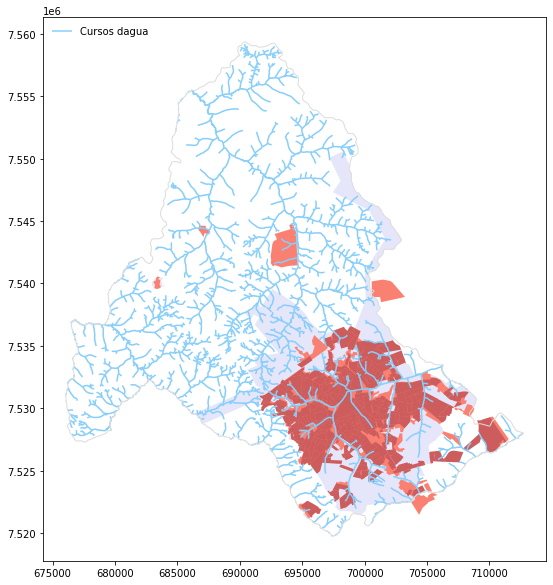

In [ ]:
# Area do limite municipal
ax = limite_municipal.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
# Area da regiao adm
# ax = regiao_adm.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# relevo
# curvas_10.plot(color='antiquewhite', ax=ax)

# cursos dagua
cursos_dagua.plot(color='lightskyblue', markersize=2, ax=ax, label='Cursos dagua')

#perimetro urbano
perimetro_urbano_2018.plot(color='lavender', ax=ax, label='Perimetro urbano')

# mancha urbana
mancha_urbana.plot(color='salmon', ax=ax, label='Mancha Urbana')

# loteamentos
loteamentos_bauru.plot(color='indianred', ax=ax, label='Loteamentos')


#vias locais
# vias_locais.plot(color='silver', ax=ax)

#vias rurais
# vias_rurais.plot(color='moccasin', ax=ax)

## arrumar

# massa dagua
# massa_dagua.plot(color='blue', ax=ax)

#setores planejamento
# setores_planejamento.plot(color='magenta', ax=ax)

# vias principais
# vias_principais.plot(color='yellow', ax=ax)

#ferrovia
# ferrovia.plot(color='black', markersize=1, ax=ax)

# rodovias
# rodovias.plot(color='yellow', ax=ax)


leg = ax.legend(loc='upper left', frameon=False)

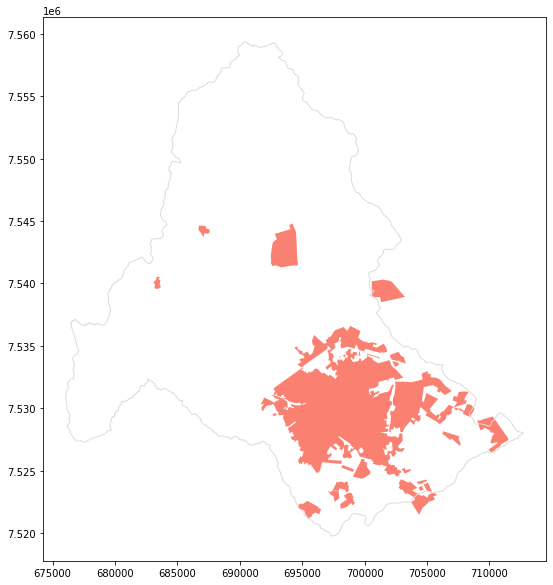

In [ ]:
# Area do limite municipal
ax = limite_municipal.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# mancha urbana
mancha_urbana.plot(color='salmon', ax=ax)

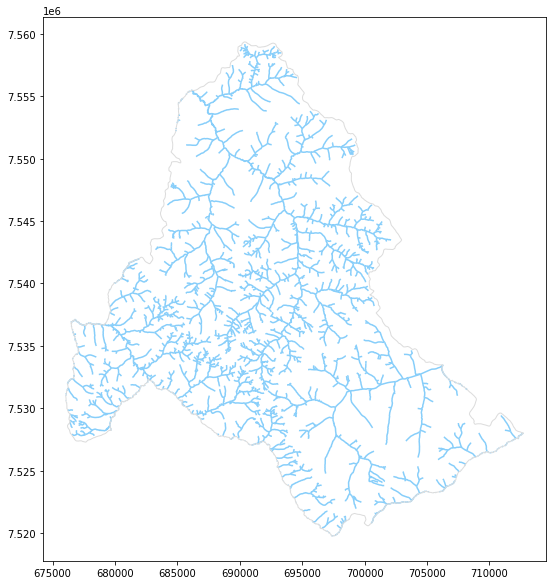

In [ ]:
# Area do limite municipal
ax = limite_municipal.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# cursos dagua
cursos_dagua.plot(color='lightskyblue', markersize=2, ax=ax)

# Interativos

In [ ]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## Setores do planejamento

In [ ]:
setores_planejamento.head()

,Id,SETOR,setor_num,geometry
0,0,7,7.0,"POLYGON ((696156.828 7535697.556, 698348.933 7..."
1,0,8,8.0,"POLYGON ((698707.646 7533351.394, 698698.358 7..."
2,0,9,9.0,"POLYGON ((699421.032 7535405.640, 699385.864 7..."
3,0,12,12.0,"POLYGON ((700262.856 7531298.519, 700383.241 7..."
4,0,11,11.0,"POLYGON ((700262.856 7531298.519, 700545.245 7..."


In [ ]:
# Create a base map
m_2 = folium.Map(location=[-22.37652,-49.05083], tiles='OpenStreetMap', zoom_start=20)

# Add a choropleth map to the base map
folium.Choropleth(geo_data=setores_planejamento, 
              #  data=plot_data,
          #  data= dados, 
           columns=['SETOR', 'geometry'],
           key_on="feature.id", 
           fill_color='YlOrRd', 
           fill_opacity=0.2,
            line_opacity=0.9,
           legend_name='Setores de Bauru'
          ).add_to(m_2)


# Display the map
m_2

In [225]:
perimetro_urbano_2018.head()

,TIPO,Area_ha,geometry
0,Perímetro Urbano,20199.08,MULTIPOLYGON Z (((696526.514 7521914.041 0.000...


## PERIMETRO URBANO

In [230]:
# Create a base map
m_3 = folium.Map(location=[-22.37652,-49.05083], tiles='OpenStreetMap', zoom_start=12)

          # Add a choropleth map to the base map
folium.Choropleth(geo_data= perimetro_urbano_2018, 
              #  data=plot_data,
          #  data= dados, 
           columns=['ID_OBJETO', 'geometry'],
           key_on="feature.id", 
           fill_color='YlOrRd', 
           fill_opacity=0.2,
            line_opacity=0.9,
           legend_name='Setores de Bauru'
          ).add_to(m_3)


# Display the map
m_3

## MANCHA URBANA

In [223]:
mancha_urbana.head()

,ID_OBJETO,NOME,NOMEABREV,GEOMETRIAA,geometry
0,1575.0,Bauru,Bauru,Nã,MULTIPOLYGON Z (((695882.815 7522311.554 0.000...


In [228]:
# Create a base map
m_4 = folium.Map(location=[-22.37652,-49.05083], tiles='OpenStreetMap', zoom_start=13)

          # Add a choropleth map to the base map
folium.Choropleth(geo_data=mancha_urbana, 
              #  data=plot_data,
          #  data= dados, 
           columns=['ID_OBJETO', 'geometry'],
           key_on="feature.id", 
           fill_color='YlOrRd', 
           fill_opacity=0.2,
            line_opacity=0.9,
           legend_name='Setores de Bauru'
          ).add_to(m_4)


# Display the map
m_4

## Outros

In [ ]:
cursos_dagua.head()

,FID_cursos,TIPO,NOME,BACIA,APA,ordem,extensao,QuaHidr,FID_perím,OBJECTID,Shape_Leng,Shape_Area,geometry
0,0,Rio,None,Bacia Batalha,APA,2,565.89,Classe 2,0,1,152601.229838,6.719439e+08,MULTILINESTRING Z ((692006.433 7529585.604 0.0...
1,1,Rio,None,Bacia Batalha,APA,1,229.40,Classe 2,0,1,152601.229838,6.719439e+08,"LINESTRING Z (691831.056 7529513.153 0.000, 69..."
2,2,Rio,None,Bacia Batalha,APA,1,105.30,Classe 2,0,1,152601.229838,6.719439e+08,"LINESTRING Z (691933.940 7529639.565 0.000, 69..."
3,3,Rio,None,Bacia Batalha,APA,2,460.39,Classe 2,0,1,152601.229838,6.719439e+08,"LINESTRING Z (692938.436 7529389.433 0.000, 69..."
4,4,Rio,None,Bacia Batalha,APA,1,83.62,Classe 2,0,1,152601.229838,6.719439e+08,"LINESTRING Z (692938.436 7529389.433 0.000, 69..."


In [ ]:
folium.PolyLine(cursos_dagua).add_to(m_2)

RecursionError: ignored

In [ ]:
m = folium.Map(location=[-22.3154,-49.0615], tiles="Stamen Toner", zoom_start=12)

folium.Circle(
    radius=100,
    location=[-22.3154,-49.0615],
    popup="The Waterfront",
    color="crimson",
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[-22.3154,-49.0615],
    radius=50,
    popup="Laurelhurst Park",
    color="#3186cc",
    fill=True,
    fill_color="#3186cc",
).add_to(m)


m

In [ ]:
m = folium.Map(location=[-22.3154,-49.0615], tiles="Stamen Terrain", zoom_start=12)

m.add_child(folium.LatLngPopup())

m